# Example usages of pygooglenews library

## Setup 

Install pygooglenews library with pip:
    # first, always upgrade pip!
    pip install --upgrade pip
    pip install pygooglenews --upgrade

#### Load dependency libraries

In [1]:
!pip install pygooglenews --upgrade
!pip install bs4
!pip install langdetect
from pygooglenews import GoogleNews
from langdetect import detect
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt

### Working with Google News in Production

Every time you call any function there is an HTTPS request to Google's servers. To prevent your servers IP address being locked by Google we sould use a service that handles proxy rotation for us. In this case we are using **ScrapingBee API**.

ScrapingBee API key:

    QEUXIXLN8OULIISPZ1FXZUCWF7M42ZOUXRV7491R6RYQTFCSV8A4Y1B2YFPCD0HL2X62KPGTHFODSW6T

NOTE: This API key is available till 08 March 2021 and expires after 200 requests  
NOTE: **this Python package still works out of the box**.

#### Create constant variable for API key

In [2]:
SCRAPING_BEE_API_KEY = 'QEUXIXLN8OULIISPZ1FXZUCWF7M42ZOUXRV7491R6RYQTFCSV8A4Y1B2YFPCD0HL2X62KPGTHFODSW6T'

#### Making sure API key works

In [3]:
import requests

def send_request():
    response = requests.get(
        url="https://app.scrapingbee.com/api/v1/",
        params={
            "api_key": SCRAPING_BEE_API_KEY,
            "url": "http://httpbin.org/headers?json",  
        },
        
    )
    print('Response HTTP Status Code: ', response.status_code)

    
send_request()

Response HTTP Status Code:  200


## Examples

#### Defining functions for better data visulation

In [4]:
def remove_html_tags(html):
    return BeautifulSoup(html).get_text()

def convert_news_json_to_df(news):
    data = []

    for entry in news["entries"]:

        title = entry['title']
        summary = remove_html_tags(entry['summary'])
        published = datetime.strptime(entry['published'], "%a, %d %b %Y %H:%M:%S %Z")
        link = entry['link']
        source = entry['source']['title']
        language = detect(summary)

        data.append({
            'title': title,
            'summary': summary,
            'published': published,
            'link': link,
            'source': source,
            'language': language
        })

    return pd.DataFrame(data).sort_values('published', ascending=False)

### Create GoogleNews Object

In [5]:
gn = GoogleNews()

### Get top news with pygooglenews using ScrapingBee

In [6]:
top_news = gn.top_news(scraping_bee=SCRAPING_BEE_API_KEY)

convert_news_json_to_df(top_news)

,title,summary,published,link,source,language
36,Maine CDC reports one new coronavirus-related ...,Maine CDC reports one new coronavirus-related ...,2021-02-08 17:40:00,https://news.google.com/__i/rss/rd/articles/CB...,WMTW Portland,en
4,"Myanmar junta imposes curfew, meeting bans as ...","Myanmar junta imposes curfew, meeting bans as ...",2021-02-08 17:28:50,https://news.google.com/__i/rss/rd/articles/CB...,Associated Press,en
6,GOP Sen. Richard Shelby of Alabama won't run f...,GOP Sen. Richard Shelby of Alabama won't run f...,2021-02-08 17:28:00,https://news.google.com/__i/rss/rd/articles/CB...,CNN,en
0,Donald Trump's Attorneys Detail Impeachment Tr...,Donald Trump's Attorneys Detail Impeachment Tr...,2021-02-08 17:11:05,https://news.google.com/__i/rss/rd/articles/CB...,NPR,en
2,Democratic lawmakers splinter over criteria fo...,Democratic lawmakers splinter over criteria fo...,2021-02-08 17:07:00,https://news.google.com/__i/rss/rd/articles/CB...,The Washington Post,en
14,"Tesla buys $1.5 billion in bitcoin, sending it...","Tesla buys $1.5 billion in bitcoin, sending it...",2021-02-08 17:01:00,https://news.google.com/__i/rss/rd/articles/CB...,Ars Technica,en
26,Watch The Weeknd's Super Bowl 2021 halftime sh...,Watch The Weeknd's Super Bowl 2021 halftime sh...,2021-02-08 17:00:00,https://news.google.com/__i/rss/rd/articles/CB...,CNET,en
35,"Despite dip in COVID-19 cases, expert says US ...","Despite dip in COVID-19 cases, expert says US ...",2021-02-08 16:34:00,https://news.google.com/__i/rss/rd/articles/CB...,WMTW Portland,en
1,Republican Rep. Ron Wright of Texas is first s...,Republican Rep. Ron Wright of Texas is first s...,2021-02-08 16:12:00,https://news.google.com/__i/rss/rd/articles/CB...,CNBC,en
9,Watch: Oklahoma fire crews climb on top of car...,Watch: Oklahoma fire crews climb on top of car...,2021-02-08 15:59:00,https://news.google.com/__i/rss/rd/articles/CB...,KFOR Oklahoma City,en


### Advanced Querying Search

[Google XML reference for the search query](https://developers.google.com/custom-search/docs/xml_results)

#### Get articles that mention TSLA or Tesla

In [7]:
s = gn.search('TSLA OR Tesla', scraping_bee=SCRAPING_BEE_API_KEY)

convert_news_json_to_df(s)

,title,summary,published,link,source,language
1,"Stocks making the biggest moves midday: Tesla,...","Stocks making the biggest moves midday: Tesla,...",2021-02-08 17:10:00,https://www.cnbc.com/2021/02/08/stocks-making-...,CNBC,en
12,"Is Tesla worth a trillion dollars? You bet, sa...","Is Tesla worth a trillion dollars? You bet, sa...",2021-02-08 16:17:10,https://www.startribune.com/is-tesla-worth-a-t...,Minneapolis Star Tribune,en
34,Ex-OCC Chief Brooks Calls Tesla’s Bitcoin Buy ...,Ex-OCC Chief Brooks Calls Tesla’s Bitcoin Buy ...,2021-02-08 15:29:00,https://finance.yahoo.com/news/ex-occ-chief-br...,Yahoo Finance,en
11,"Tesla buys $1.5B in Bitcoin, will accept as pa...","Tesla buys $1.5B in Bitcoin, will accept as pa...",2021-02-08 14:59:46,https://www.startribune.com/tesla-buys-1-5b-in...,Minneapolis Star Tribune,en
19,Tesla buys $1.5 billion of bitcoin - Yahoo Fin...,Tesla buys $1.5 billion of bitcoin Yahoo Finance,2021-02-08 14:35:00,https://finance.yahoo.com/video/tesla-buys-1-5...,Yahoo Finance,en
...,...,...,...,...,...,...
89,"Stocks making the biggest moves midday: Tesla,...","Stocks making the biggest moves midday: Tesla,...",2021-01-12 08:00:00,https://www.cnbc.com/2021/01/12/stocks-making-...,CNBC,en
72,"He began buying Tesla at just $7.50, and now h...","He began buying Tesla at just $7.50, and now h...",2021-01-11 08:00:00,https://www.marketwatch.com/story/he-began-buy...,MarketWatch,en
63,'The market is paying Tesla to take capital': ...,'The market is paying Tesla to take capital': ...,2021-01-11 08:00:00,https://finance.yahoo.com/news/the-market-is-p...,Yahoo Finance,en
27,Tesla is surging. Is it too late for investors...,Tesla is surging. Is it too late for investors...,2021-01-10 08:00:00,https://www.cnn.com/2021/01/10/investing/tesla...,CNN,en


### Advanced Querying Search Without Limited Number Of Articles Per Query

#### Get articles from 300 days ago till today that mention Tesla in the title

In [8]:
end_date = pd.to_datetime('today').date()
start_date = end_date - timedelta(days = 300)
# delta = timedelta(weeks=1) 
delta = timedelta(days=1)
dates = []

while start_date <= end_date:
    dates.append(str(start_date))
    start_date += delta

gn = GoogleNews(lang = 'en')
df = pd.DataFrame()

for i in range(len(dates)-1):
    result = gn.search('allintitle:' + 'Tesla', from_=dates[i], to_=dates[i+1])
    df = df.append(convert_news_json_to_df(result))
    
df = df.sort_values('published', ascending=False)
df

,title,summary,published,link,source,language
22,Tesla may soon be entering Indonesia to produc...,Tesla may soon be entering Indonesia to produc...,2021-02-08 07:33:00,https://www.topgear.com.ph/news/industry-news/...,Top Gear Philippines,en
40,Tesla Stock price - GameStop timeline: A close...,Tesla Stock price - GameStop timeline: A close...,2021-02-08 06:59:35,https://fintechzoom.com/fintech_news_tesla-nas...,Fintech Zoom,en
30,Triton N4 EV to arrive in India to compete wit...,Triton N4 EV to arrive in India to compete wit...,2021-02-08 06:38:36,https://techstory.in/triton-n4-ev-to-arrive-in...,Techstory,en
24,This Is What It’s Like To Take A Tesla On A Wi...,This Is What It’s Like To Take A Tesla On A Wi...,2021-02-08 06:00:00,https://www.gizmodo.com.au/2021/02/this-is-wha...,Gizmodo Australia,en
39,Tesla News - Custom BMW S1000RR 'Phantom' is t...,Tesla News - Custom BMW S1000RR 'Phantom' is t...,2021-02-08 05:53:05,https://fintechzoom.com/fintech_news_nets/tesl...,Fintech Zoom,en
...,...,...,...,...,...,...
4,Tesla Just Brought Back the Long-Range RWD Mod...,Tesla Just Brought Back the Long-Range RWD Mod...,2020-04-14 07:00:00,https://www.autoweek.com/news/industry-news/a3...,Autoweek,en
3,Zoox and Tesla Settle Lawsuit - GlobeNewswire,Zoox and Tesla Settle Lawsuit GlobeNewswire,2020-04-14 07:00:00,https://www.globenewswire.com/news-release/202...,GlobeNewswire,en
2,If Tesla’s Dream Of Making Cameras Perform As ...,If Tesla’s Dream Of Making Cameras Perform As ...,2020-04-14 07:00:00,https://www.forbes.com/sites/bradtempleton/202...,Forbes,en
25,Is Tesla Inc (TSLA) Stock About to Get Hot Tue...,Is Tesla Inc (TSLA) Stock About to Get Hot Tue...,2020-04-14 07:00:00,https://www.investorsobserver.com/news/stock-u...,InvestorsObserver,en


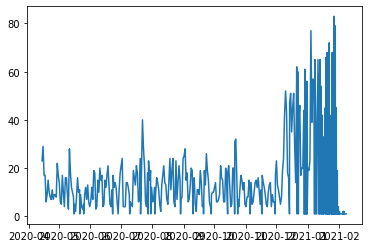

In [9]:
agg = df.groupby(['published']).agg('count')
plt.plot(agg.index, agg['title'])